In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"D:\Data Science\datasets\New folder\traffic.csv")

In [4]:
df

,Date,Visits
0,01-01-2020,1554.0
1,01-02-2020,2820.0
2,01-03-2020,2970.0
3,01-04-2020,2111.0
4,01-05-2020,2393.0
...,...,...
1911,NaN,NaN
1912,NaN,NaN
1913,NaN,NaN
1914,NaN,NaN


#  Data Preprocessing

In [5]:
df

,Date,Visits
0,01-01-2020,1554.0
1,01-02-2020,2820.0
2,01-03-2020,2970.0
3,01-04-2020,2111.0
4,01-05-2020,2393.0
...,...,...
1911,NaN,NaN
1912,NaN,NaN
1913,NaN,NaN
1914,NaN,NaN


In [6]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 232 entries, 0 to 231
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    232 non-null    object 
 1   Visits  232 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.4+ KB


In [8]:
def parse_dates(date):
    for fmt in ('%m-%d-%Y', '%m/%d/%Y'):
        try:
            return pd.to_datetime(date, format=fmt)
        except ValueError:
            continue
    return pd.NaT

df['Date'] = df['Date'].apply(parse_dates)

print(df)


          Date  Visits
0   2020-01-01  1554.0
1   2020-01-02  2820.0
2   2020-01-03  2970.0
3   2020-01-04  2111.0
4   2020-01-05  2393.0
..         ...     ...
227 2020-08-15  2221.0
228 2020-08-16  2724.0
229 2020-08-17  3456.0
230 2020-08-18  3581.0
231 2020-08-19  2064.0

[232 rows x 2 columns]


In [9]:
# Step 3: Ensure 'Visits' is numerical
df['Visits'] = pd.to_numeric(df['Visits'], errors='coerce')

In [10]:
# Step 5: Sort by date
df.sort_values(by='Date', inplace=True)


In [11]:
# Step 6: Check for anomalies in 'Visits' (e.g., negative values)
if (df['Visits'] < 0).any():
    print("Negative values found in 'Visits'. Removing them.")
    df = df[df['Visits'] >= 0]

#  Exploratory Data Analysis (EDA)
EDA will help us understand the dataset better and uncover patterns, trends, and potential issues.



Summary Statistics for 'Visits':
count     232.000000
mean     4081.435345
std      1018.730432
min      1554.000000
25%      3428.250000
50%      3988.000000
75%      4874.750000
max      6659.000000
Name: Visits, dtype: float64


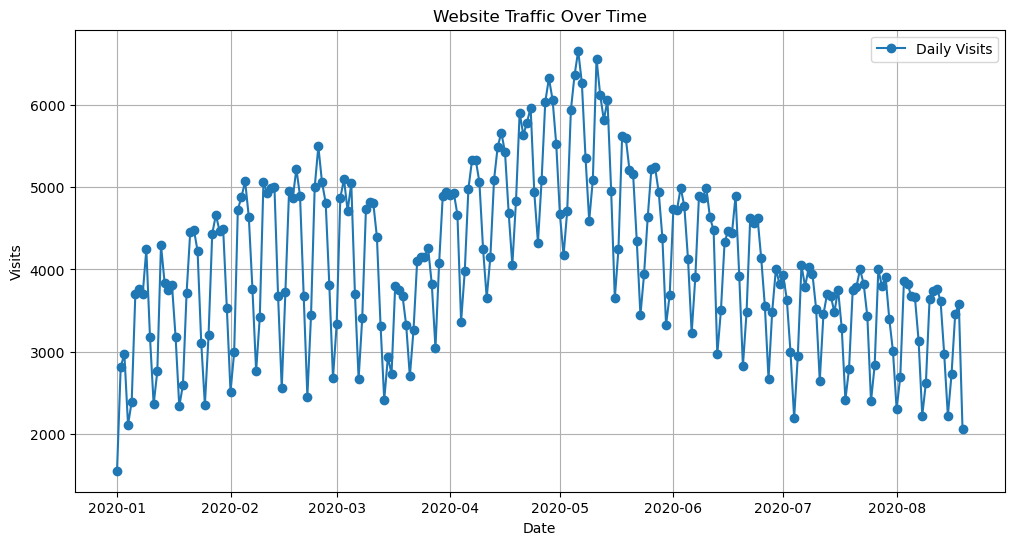

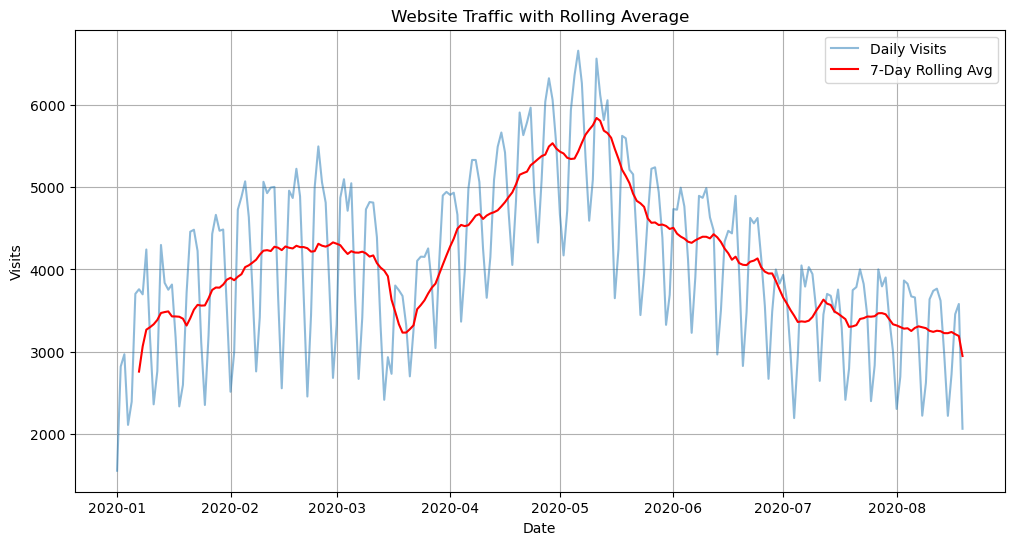

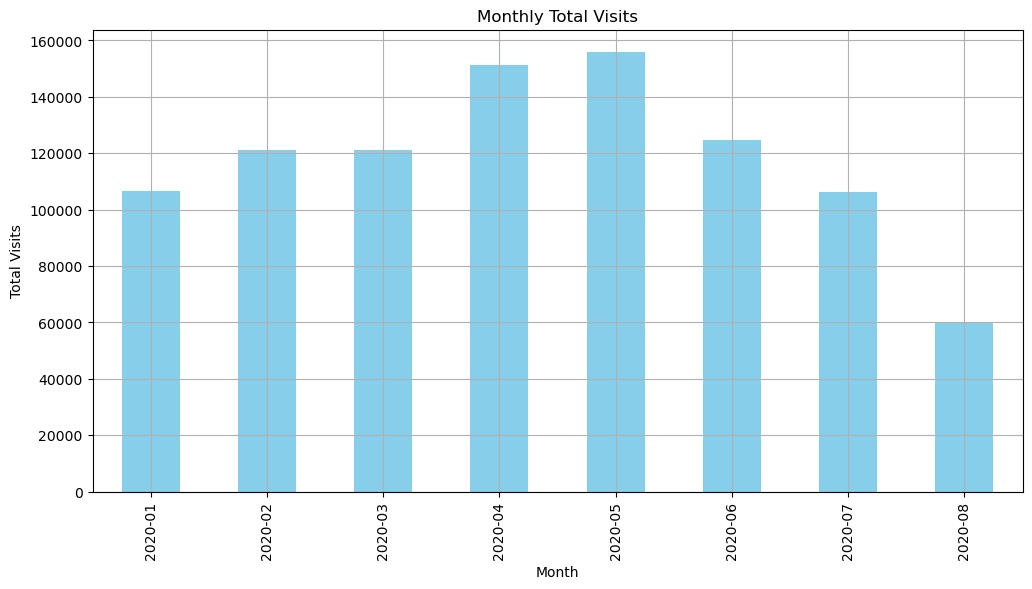

In [12]:
import seaborn as sns

# 1. Summary Statistics
print("Summary Statistics for 'Visits':")
print(df['Visits'].describe())

# 2. Visualize Trends Over Time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Visits'], marker='o', linestyle='-', label='Daily Visits')
plt.title('Website Traffic Over Time')
plt.xlabel('Date')
plt.ylabel('Visits')
plt.grid()
plt.legend()
plt.show()

# 3. Rolling Averages (7-day rolling mean)
df['7-day Rolling Avg'] = df['Visits'].rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Visits'], alpha=0.5, label='Daily Visits')
plt.plot(df['Date'], df['7-day Rolling Avg'], color='red', label='7-Day Rolling Avg')
plt.title('Website Traffic with Rolling Average')
plt.xlabel('Date')
plt.ylabel('Visits')
plt.grid()
plt.legend()
plt.show()

# 4. Aggregated Monthly Data
df['Month'] = df['Date'].dt.to_period('M')
monthly_visits = df.groupby('Month')['Visits'].sum()

plt.figure(figsize=(12, 6))
monthly_visits.plot(kind='bar', color='skyblue')
plt.title('Monthly Total Visits')
plt.xlabel('Month')
plt.ylabel('Total Visits')
plt.grid()
plt.show()


#### Min and Max:

Minimum daily visits: 1,554
    
Maximum daily visits: 6,659
    
The range of visits is quite large, suggesting possible spikes or dips in traffic.

#### Quartiles:

25% of the days have visits less than 3,428.25

50% (Median): Half of the days have visits below 3,988
    
75% of the days have visits below 4,874.75

This indicates that the data might be slightly right-skewed (a few days have very high visits).

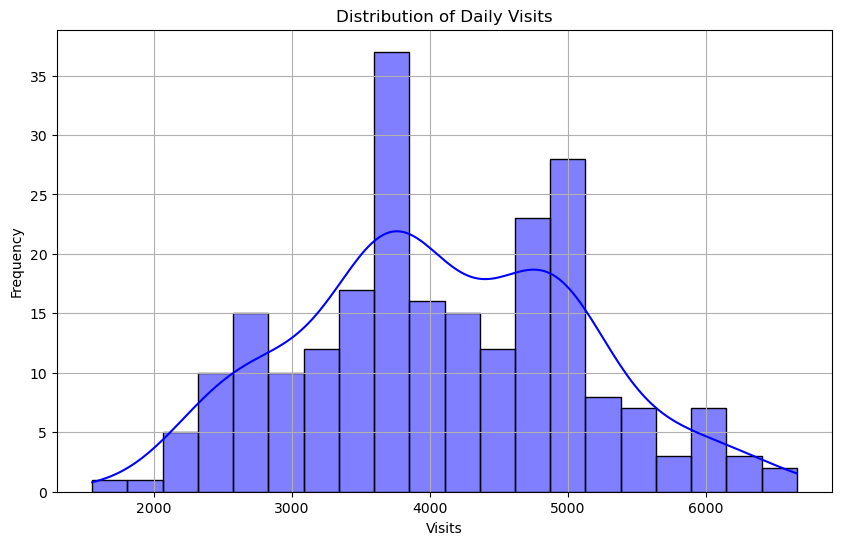

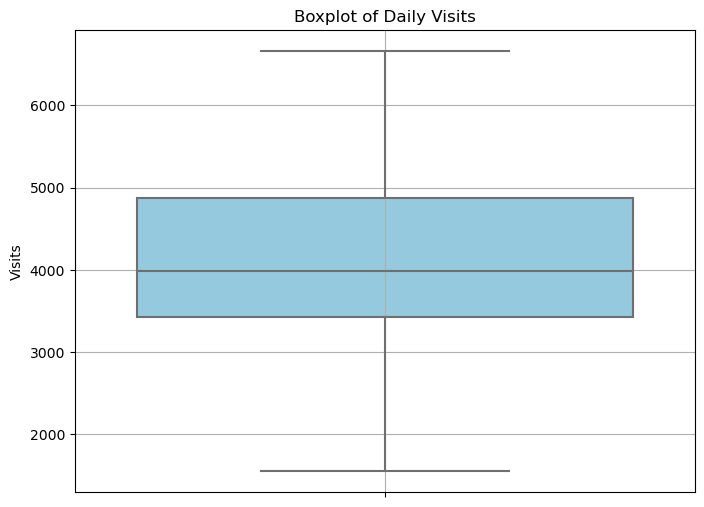

In [13]:
# 2. Histogram: Distribution of Visits
plt.figure(figsize=(10, 6))
sns.histplot(df['Visits'], bins=20, kde=True, color='blue')
plt.title('Distribution of Daily Visits')
plt.xlabel('Visits')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# 3. Boxplot: Detect Outliers in Visits
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Visits'], color='skyblue')
plt.title('Boxplot of Daily Visits')
plt.ylabel('Visits')
plt.grid()
plt.show()



In [14]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(df['Visits'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

if result[1] <= 0.05:
    print("The time series is stationary (reject null hypothesis).")
else:
    print("The time series is not stationary (fail to reject null hypothesis).")


ADF Statistic: -0.9372570354445035
p-value: 0.7754557405544421
The time series is not stationary (fail to reject null hypothesis).


# Transforming the Data

We can try the following transformations to make the series stationary:

$Log Transformation:$
    
Reduces variance and stabilizes the series

$Differencing:$
    
Removes trends by subtracting the previous value from the current value.

In [15]:
import numpy as np

# 1. Log Transformation
df['Log Visits'] = np.log(df['Visits'])

# 2. Differencing
df['Log Diff Visits'] = df['Log Visits'].diff()

# Drop the first row with NaN after differencing
df.dropna(inplace=True)

# Recheck Stationarity with ADF Test
result_transformed = adfuller(df['Log Diff Visits'])
print("ADF Statistic (Transformed):", result_transformed[0])
print("p-value (Transformed):", result_transformed[1])

if result_transformed[1] <= 0.05:
    print("The transformed series is stationary (reject null hypothesis).")
else:
    print("The transformed series is still not stationary (fail to reject null hypothesis).")


ADF Statistic (Transformed): -2.780246819868848
p-value (Transformed): 0.06115123742675483
The transformed series is still not stationary (fail to reject null hypothesis).


In [16]:
# Apply second-order differencing
df['Second Diff Visits'] = df['Log Diff Visits'].diff()

# Drop the first row with NaN after differencing
df.dropna(inplace=True)

# Recheck Stationarity with ADF Test
result_second_diff = adfuller(df['Second Diff Visits'])
print("ADF Statistic (Second Differencing):", result_second_diff[0])
print("p-value (Second Differencing):", result_second_diff[1])

if result_second_diff[1] <= 0.05:
    print("The series is now stationary (reject null hypothesis).")
else:
    print("The series is still not stationary (fail to reject null hypothesis).")


ADF Statistic (Second Differencing): -7.489547294960626
p-value (Second Differencing): 4.54375904282534e-11
The series is now stationary (reject null hypothesis).


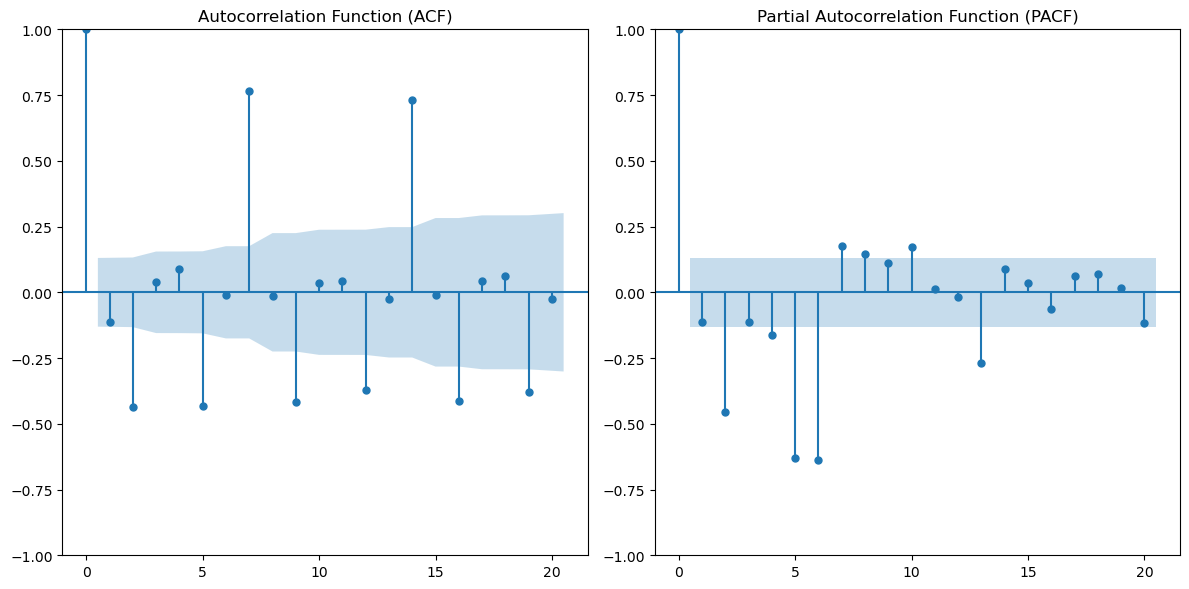

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))

# ACF Plot
plt.subplot(1, 2, 1)
plot_acf(df['Second Diff Visits'], ax=plt.gca(), lags=20)
plt.title('Autocorrelation Function (ACF)')

# PACF Plot
plt.subplot(1, 2, 2)
plot_pacf(df['Second Diff Visits'], ax=plt.gca(), lags=20)
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


C:\Users\ALEX\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ALEX\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ALEX\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Visits   No. Observations:                  225
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -1713.450
Date:                Wed, 01 Jan 2025   AIC                           3436.899
Time:                        23:35:11   BIC                           3453.935
Sample:                             0   HQIC                          3443.777
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8575      0.054     15.791      0.000       0.751       0.964
ar.L2         -0.6565      0.054    -12.163      0.000      -0.762      -0.551
ma.L1         -1.8292      0.043    -42.935      0.0

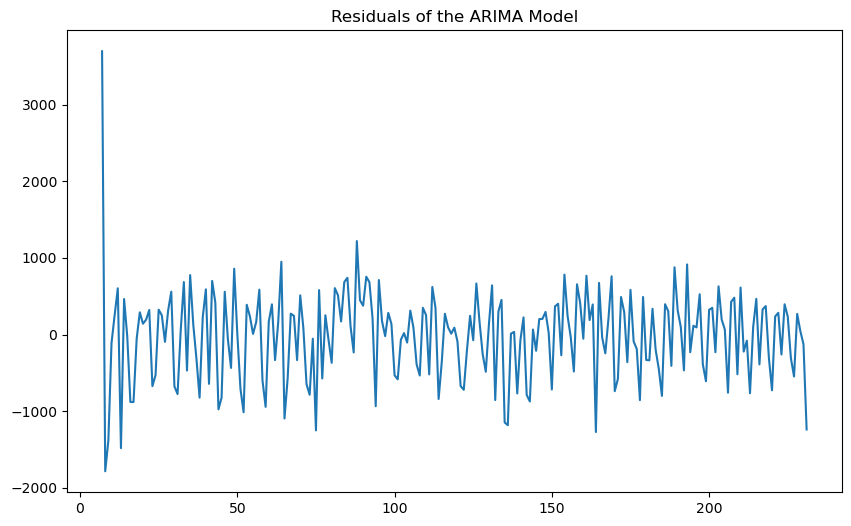

Forecasted Values:
225    1698.135206
226    2346.292799
227    3108.203991
228    3301.935806
229    2933.792696
230    2456.878564
231    2255.575387
232    2362.008698
233    2551.373159
234    2609.815124
Name: predicted_mean, dtype: float64


C:\Users\ALEX\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [18]:
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(df['Visits'], order=(2, 2, 2)) 
model_fit = model.fit()


print(model_fit.summary())

residuals = model_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title("Residuals of the ARIMA Model")
plt.show()

forecast = model_fit.forecast(steps=10)
print("Forecasted Values:")
print(forecast)


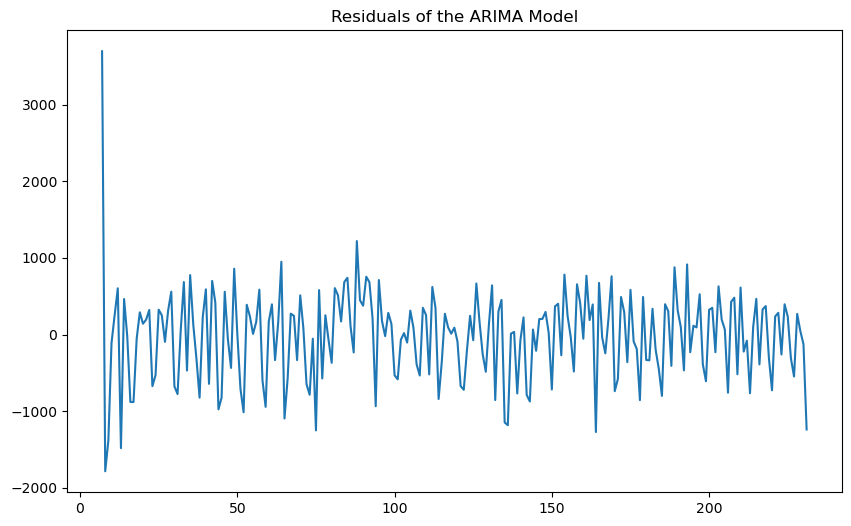

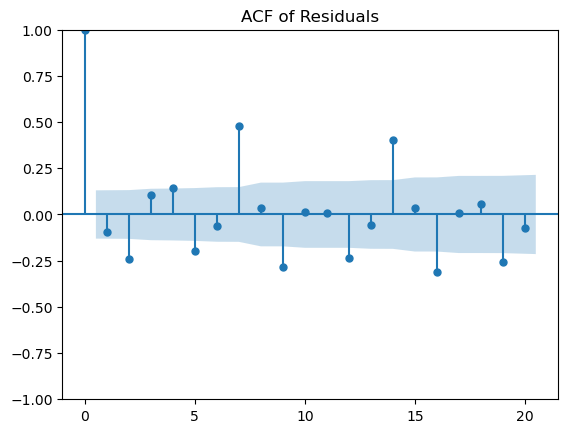

Shapiro-Wilk Test Statistic: 0.9298688625476006
p-value: 7.0569263750286924e-09
Residuals do not appear to be normally distributed.


In [19]:
residuals = model_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title("Residuals of the ARIMA Model")
plt.show()

plot_acf(residuals, lags=20)
plt.title("ACF of Residuals")
plt.show()

from scipy.stats import shapiro
stat, p = shapiro(residuals)
print("Shapiro-Wilk Test Statistic:", stat)
print("p-value:", p)
if p > 0.05:
    print("Residuals appear to be normally distributed.")
else:
    print("Residuals do not appear to be normally distributed.")


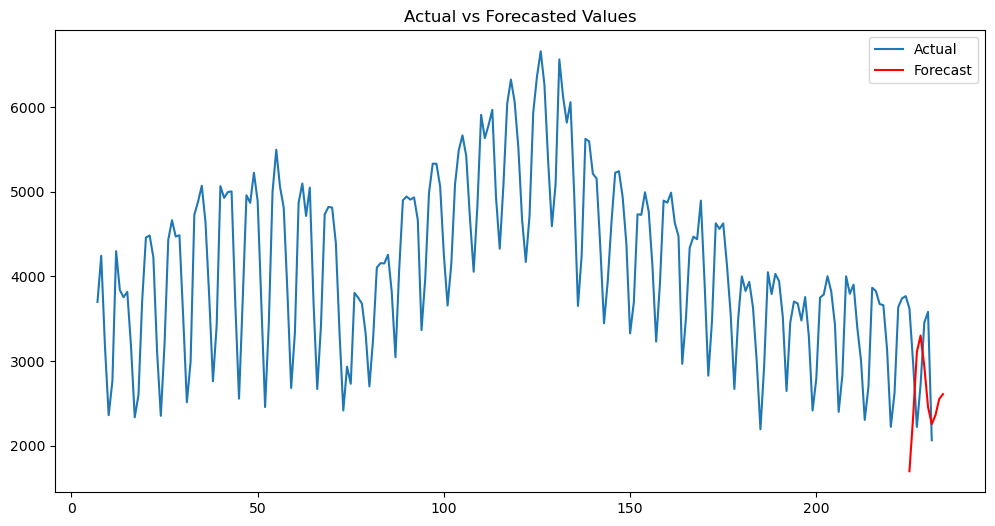

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(df['Visits'], label='Actual')
plt.plot(range(len(df), len(df)+len(forecast)), forecast, label='Forecast', color='red')
plt.title("Actual vs Forecasted Values")
plt.legend()
plt.show()


In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


train_data = df['Visits'][:-10]  
validation_data = df['Visits'][-10:]  

# Train ARIMA model on training set
model = ARIMA(train_data, order=(2, 2, 2))  
model_fit = model.fit()

forecast = model_fit.forecast(steps=10)


mae = mean_absolute_error(validation_data, forecast)
mse = mean_squared_error(validation_data, forecast)
rmse = mse ** 0.5
mape = (abs(validation_data - forecast) / validation_data).mean() * 100

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape, "%")


C:\Users\ALEX\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ALEX\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ALEX\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Mean Absolute Error (MAE): 381.89170994947744
Mean Squared Error (MSE): 229995.5142285851
Root Mean Squared Error (RMSE): 479.5784755684778
Mean Absolute Percentage Error (MAPE): 13.92688122705463 %


C:\Users\ALEX\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ALEX\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df['Visits_scaled'] = scaler.fit_transform(df[['Visits']])

def create_sequences(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 10  
data = df['Visits_scaled'].values
X, y = create_sequences(data, time_steps)


train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (172, 10)
X_test shape: (43, 10)
y_train shape: (172,)
y_test shape: (43,)


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(50, activation='relu', input_shape=(time_steps, 1)),
    Dense(1) 
])


model.compile(optimizer='adam', loss='mse')

X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=1)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 0.2991 - val_loss: 0.0717
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2654 - val_loss: 0.0524
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1856 - val_loss: 0.0349
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1240 - val_loss: 0.0206
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0764 - val_loss: 0.0164
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0384 - val_loss: 0.0342
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0370 - val_loss: 0.0439
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0428 - val_loss: 0.0287
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0318 - val_loss: 0.0229
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0332 - val_loss: 0.0218
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0322 - val_loss: 0.0245
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0316 - val_loss: 0.0259
E

In [24]:
y_pred = model.predict(X_test_reshaped)

y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_actual = scaler.inverse_transform(y_pred)


from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test_actual, y_pred_actual)
mse = mean_squared_error(y_test_actual, y_pred_actual)
rmse = mse ** 0.5
mape = (abs(y_test_actual - y_pred_actual) / y_test_actual).mean() * 100

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape, "%")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
Mean Absolute Error (MAE): 412.6908328034157
Mean Squared Error (MSE): 331117.4374872072
Root Mean Squared Error (RMSE): 575.4280471850561
Mean Absolute Percentage Error (MAPE): 15.293189738167989 %


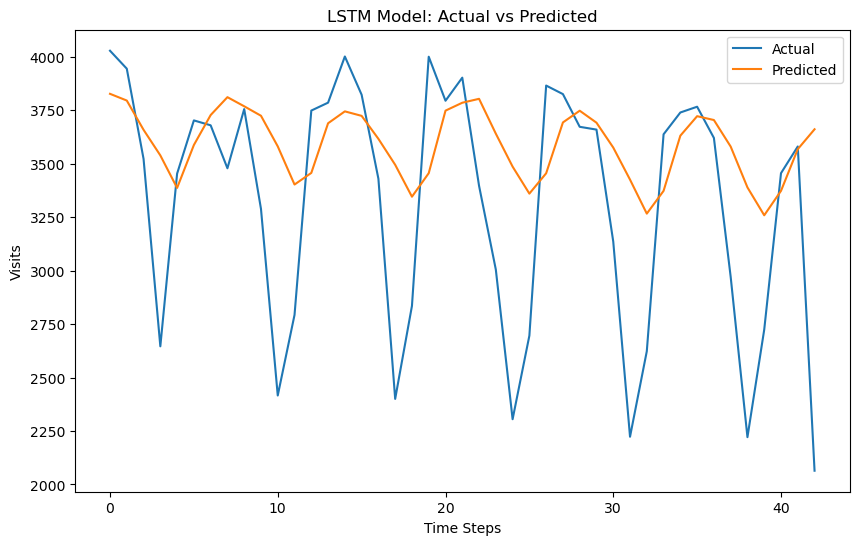

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label="Actual")
plt.plot(y_pred_actual, label="Predicted")
plt.legend()
plt.title("LSTM Model: Actual vs Predicted")
plt.xlabel("Time Steps")
plt.ylabel("Visits")
plt.show()
